STEP 1: Creating Data with Multicollinearity
--------------------------------------------------
Data Sample (First 5 rows):
          size  bedrooms  price_per_sqft  total_rooms  luxury_score  \
0  1149.014246         3      766.917868     4.176714     46.395119   
1   958.520710         3      708.676215     3.959226     44.377688   
2  1194.306561         2      811.202874     3.843571     60.664400   
3  1456.908957         5      897.319502     7.940820     56.663950   
4   929.753988         2      654.470881     2.996014     44.585508   

           price  
0  292830.930642  
1  254622.954328  
2  281118.972474  
3  385289.774311  
4  242126.470701  

Data Shape: (200, 6)
Features: ['size', 'bedrooms', 'price_per_sqft', 'total_rooms', 'luxury_score']
Target: price

STEP 2: Check Correlation Matrix

Correlation Matrix:
                size  bedrooms  price_per_sqft  total_rooms  luxury_score  \
size            1.00     -0.04            0.94        -0.05         -0.04   
bedrooms  

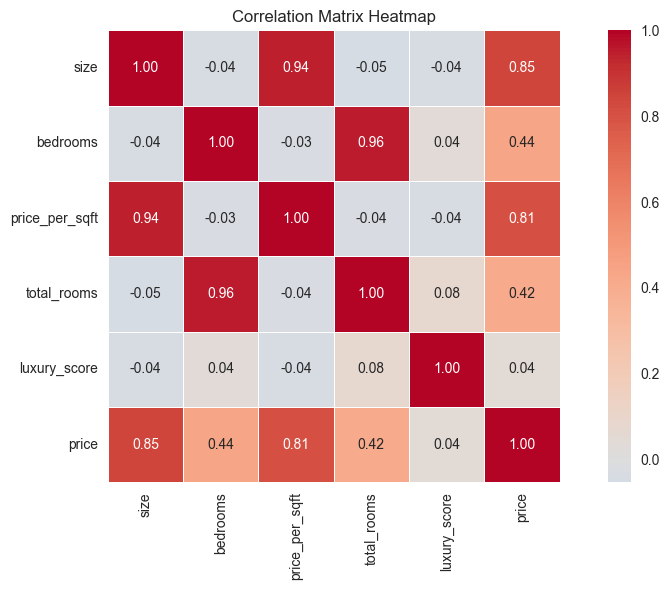


STEP 3: Visualize Relationships Between Features


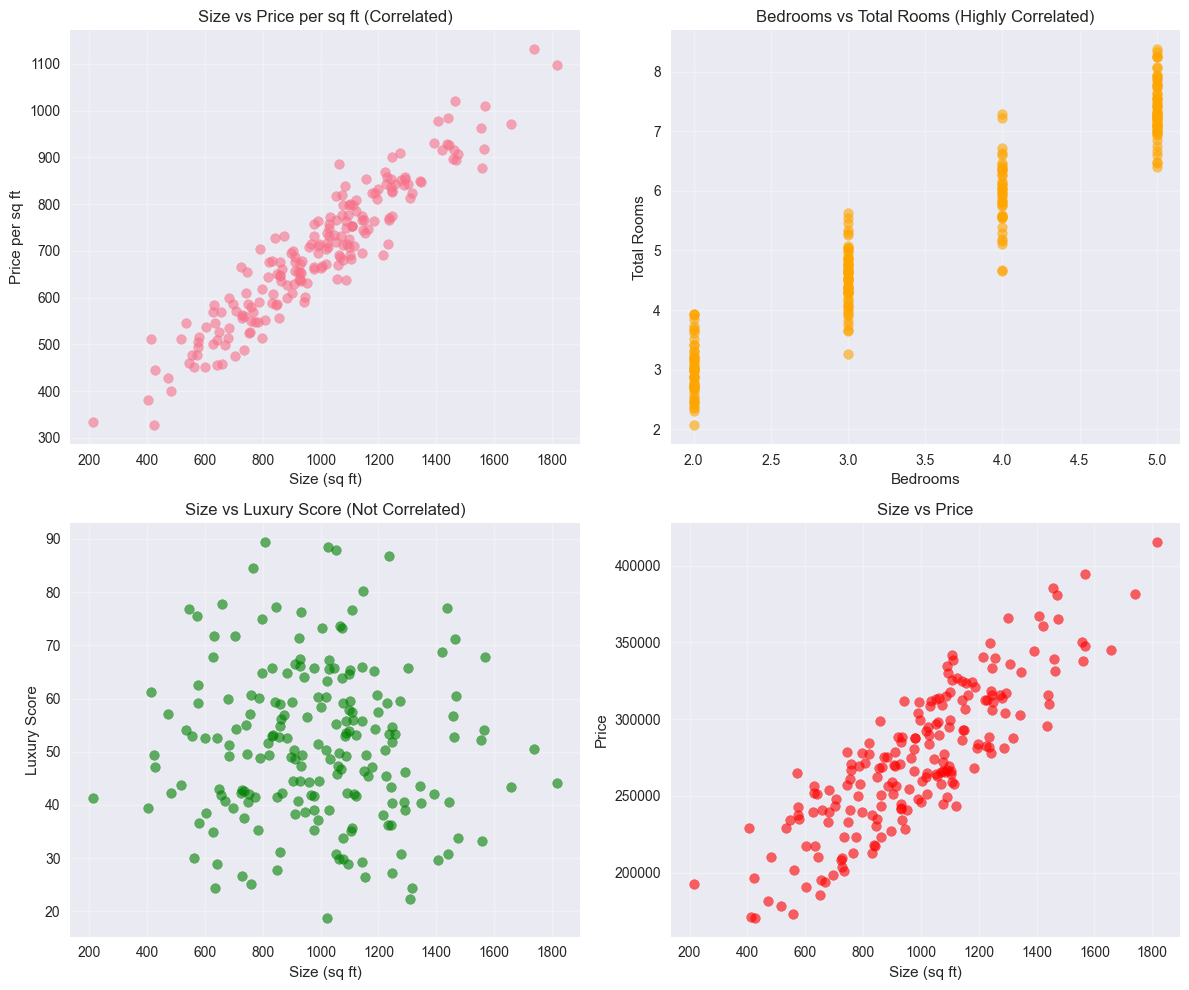


STEP 4: Calculate VIF (Variance Inflation Factor)
VIF > 5: Moderate multicollinearity
VIF > 10: High multicollinearity

VIF Values:
          Feature        VIF
0           const  56.114647
1            size   9.375523
2        bedrooms  11.969015
3  price_per_sqft   9.358479
4     total_rooms  12.039966
5    luxury_score   1.019494

⚠️  Warning: These features have VIF > 5 (multicollinearity):
          Feature        VIF
0           const  56.114647
1            size   9.375523
2        bedrooms  11.969015
3  price_per_sqft   9.358479
4     total_rooms  12.039966

STEP 5: Linear Regression BEFORE Fixing Multicollinearity

📊 Model Performance BEFORE:
R² Score: 0.9520
RMSE: $9,463

📈 Model Coefficients:
          Feature   Coefficient
0            size    146.676659
1        bedrooms  21347.365864
2  price_per_sqft      0.919189
3     total_rooms  -1050.141267
4    luxury_score    254.199663

STEP 6: Method 1 - Remove Correlated Features
Removed: 'price_per_sqft' and 'total_rooms'
Rem

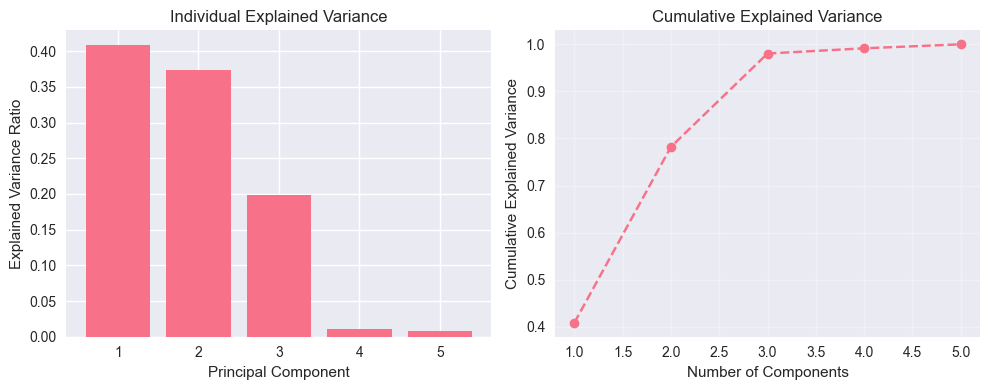


✅ Using 3 components (explains 98.0% of variance)

STEP 9: Linear Regression with PCA Components

📊 Model Performance with PCA:
R² Score: 0.9168
RMSE: $12,458
Number of features: 3 (reduced from 5)

STEP 10: Comparison of All Methods

📊 PERFORMANCE COMPARISON:
                              Method  R² Score          RMSE  Features
0  Original (with multicollinearity)  0.951984   9462.792571         5
1           Drop Correlated Features  0.952629   9399.021825         3
2                                PCA  0.916781  12457.664897         3


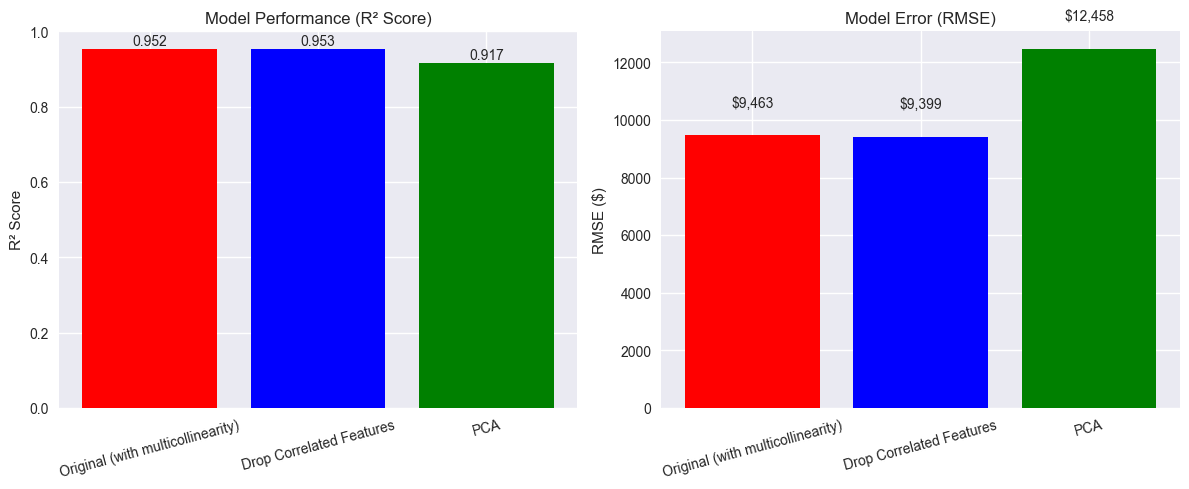


STEP 11: Check Residuals for Best Model


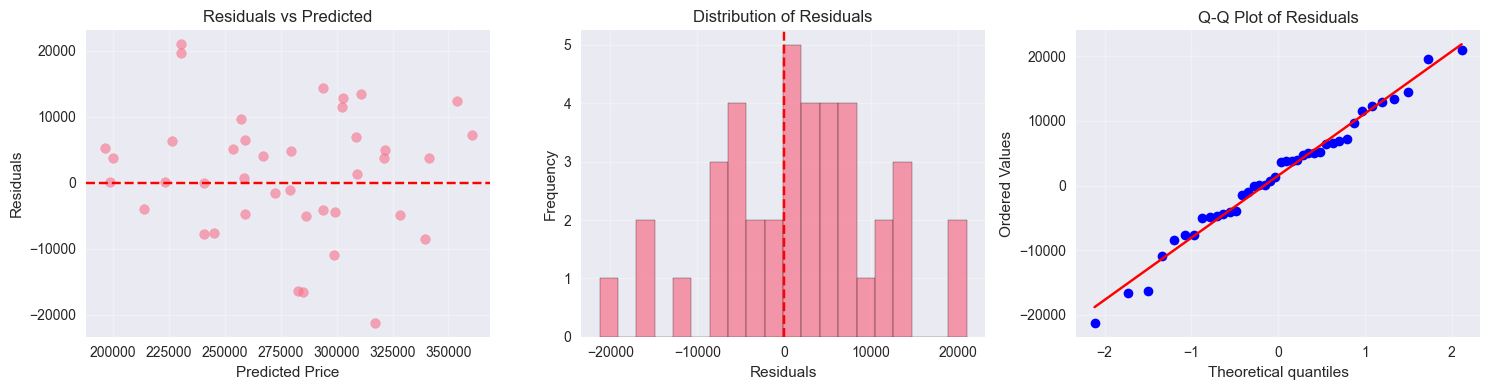


📊 Residuals Analysis:
Mean of residuals: $1,520
Std of residuals: $9,393
Residuals within ±$20,000: 95.0%

STEP 12: Make Sample Predictions

🏠 Sample House Price Predictions:
   size  bedrooms  luxury_score  predicted_price
0   800         2            30         211513.0
1  1200         3            60         297786.0
2  2000         4            90         442960.0
3  1500         3            75         345723.0


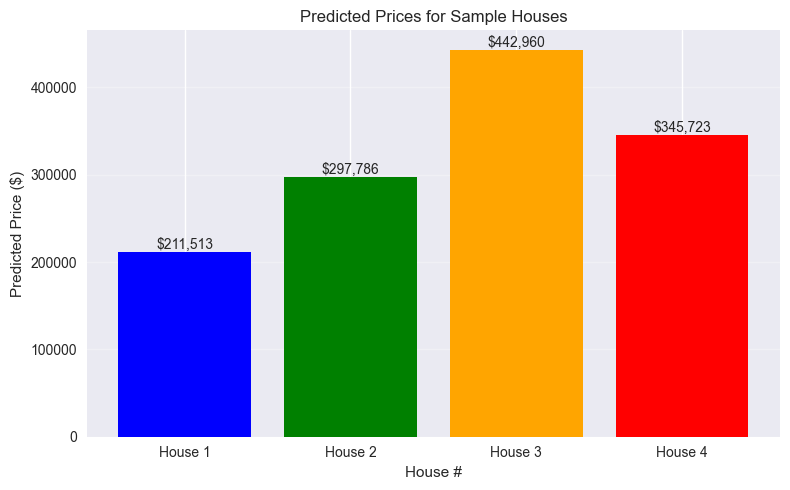


SUMMARY

✅ WHAT WE LEARNED:
1. Multicollinearity happens when features are highly correlated
2. We can detect it using:
   - Correlation matrix (look for values > 0.7)
   - VIF scores (VIF > 5 is problematic)
3. We can fix it by:
   - Dropping correlated features (simplest)
   - Using PCA to create new features
4. Results show:
   - Original model R²: 0.952
   - After dropping features R²: 0.953
   - PCA model R²: 0.917

🎯 RECOMMENDATION:
Drop correlated features for simplicity, use PCA if you need
to keep all information but remove multicollinearity


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# STEP 1: Create Data with Multicollinearity
# ============================================================================
print("STEP 1: Creating Data with Multicollinearity")
print("-" * 50)

# Create correlated features
np.random.seed(42)
n_samples = 200

# Create base features
size = np.random.normal(1000, 300, n_samples)  # House size in sq ft
bedrooms = np.random.randint(2, 6, n_samples)  # Number of bedrooms

# Create multicollinearity: 
# - price_per_sqft is similar to size (correlated)
# - total_rooms is calculated from bedrooms (highly correlated)
# - luxury_score is independent (no multicollinearity)

price_per_sqft = 200 + 0.5 * size + np.random.normal(0, 50, n_samples)
total_rooms = bedrooms * 1.5 + np.random.normal(0, 0.5, n_samples)
luxury_score = np.random.normal(50, 15, n_samples)

# Target variable: House price
price = 50000 + 150 * size + 20000 * bedrooms + 100 * luxury_score + np.random.normal(0, 10000, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'price_per_sqft': price_per_sqft,
    'total_rooms': total_rooms,
    'luxury_score': luxury_score,
    'price': price
})

print("Data Sample (First 5 rows):")
print(df.head())
print(f"\nData Shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: price")

# ============================================================================
# STEP 2: Check Correlation Matrix
# ============================================================================
print("\n" + "="*60)
print("STEP 2: Check Correlation Matrix")
print("="*60)

# Calculate correlation
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 3: Visualize Relationships
# ============================================================================
print("\n" + "="*60)
print("STEP 3: Visualize Relationships Between Features")
print("="*60)

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: size vs price_per_sqft (correlated)
axes[0, 0].scatter(df['size'], df['price_per_sqft'], alpha=0.6)
axes[0, 0].set_xlabel('Size (sq ft)')
axes[0, 0].set_ylabel('Price per sq ft')
axes[0, 0].set_title('Size vs Price per sq ft (Correlated)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: bedrooms vs total_rooms (highly correlated)
axes[0, 1].scatter(df['bedrooms'], df['total_rooms'], alpha=0.6, color='orange')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Total Rooms')
axes[0, 1].set_title('Bedrooms vs Total Rooms (Highly Correlated)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: size vs luxury_score (not correlated)
axes[1, 0].scatter(df['size'], df['luxury_score'], alpha=0.6, color='green')
axes[1, 0].set_xlabel('Size (sq ft)')
axes[1, 0].set_ylabel('Luxury Score')
axes[1, 0].set_title('Size vs Luxury Score (Not Correlated)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: size vs price
axes[1, 1].scatter(df['size'], df['price'], alpha=0.6, color='red')
axes[1, 1].set_xlabel('Size (sq ft)')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Size vs Price')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 4: Calculate VIF (Variance Inflation Factor)
# ============================================================================
print("\n" + "="*60)
print("STEP 4: Calculate VIF (Variance Inflation Factor)")
print("="*60)
print("VIF > 5: Moderate multicollinearity")
print("VIF > 10: High multicollinearity")

def calculate_vif(dataframe):
    """Calculate VIF for all features"""
    # Add constant for VIF calculation
    X = add_constant(dataframe)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    
    return vif_data

# Calculate VIF for our features (excluding target)
vif_df = calculate_vif(df.drop('price', axis=1))
print("\nVIF Values:")
print(vif_df)

# Highlight problematic VIF values
high_vif = vif_df[vif_df['VIF'] > 5]
if len(high_vif) > 0:
    print(f"\n⚠️  Warning: These features have VIF > 5 (multicollinearity):")
    print(high_vif)
else:
    print("\n✅ All features have VIF ≤ 5 (acceptable)")

# ============================================================================
# STEP 5: Run Linear Regression BEFORE Removing Multicollinearity
# ============================================================================
print("\n" + "="*60)
print("STEP 5: Linear Regression BEFORE Fixing Multicollinearity")
print("="*60)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_before = LinearRegression()
model_before.fit(X_train, y_train)

# Make predictions
y_pred_before = model_before.predict(X_test)

# Calculate metrics
r2_before = r2_score(y_test, y_pred_before)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

print("\n📊 Model Performance BEFORE:")
print(f"R² Score: {r2_before:.4f}")
print(f"RMSE: ${rmse_before:,.0f}")

# Show coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_before.coef_
})
print("\n📈 Model Coefficients:")
print(coefficients)

# ============================================================================
# STEP 6: Remove Multicollinearity - Method 1: Drop Correlated Features
# ============================================================================
print("\n" + "="*60)
print("STEP 6: Method 1 - Remove Correlated Features")
print("="*60)

# Drop highly correlated features (based on VIF and correlation)
df_dropped = df.drop(['price_per_sqft', 'total_rooms'], axis=1)
print(f"Removed: 'price_per_sqft' and 'total_rooms'")
print(f"Remaining features: {list(df_dropped.columns[:-1])}")

# Check VIF after dropping
vif_after_drop = calculate_vif(df_dropped.drop('price', axis=1))
print("\n✅ VIF after removing correlated features:")
print(vif_after_drop)

# ============================================================================
# STEP 7: Run Linear Regression AFTER Dropping Features
# ============================================================================
print("\n" + "="*60)
print("STEP 7: Linear Regression AFTER Dropping Correlated Features")
print("="*60)

# Prepare data
X_dropped = df_dropped.drop('price', axis=1)
y_dropped = df_dropped['price']

# Split data
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(
    X_dropped, y_dropped, test_size=0.2, random_state=42)

# Train model
model_after_drop = LinearRegression()
model_after_drop.fit(X_train_drop, y_train_drop)

# Make predictions
y_pred_drop = model_after_drop.predict(X_test_drop)

# Calculate metrics
r2_drop = r2_score(y_test_drop, y_pred_drop)
rmse_drop = np.sqrt(mean_squared_error(y_test_drop, y_pred_drop))

print("\n📊 Model Performance AFTER Dropping Features:")
print(f"R² Score: {r2_drop:.4f}")
print(f"RMSE: ${rmse_drop:,.0f}")

# Show coefficients
coefficients_drop = pd.DataFrame({
    'Feature': X_dropped.columns,
    'Coefficient': model_after_drop.coef_
})
print("\n📈 Model Coefficients:")
print(coefficients_drop)

# ============================================================================
# STEP 8: Remove Multicollinearity - Method 2: Use PCA
# ============================================================================
print("\n" + "="*60)
print("STEP 8: Method 2 - Use PCA (Principal Component Analysis)")
print("="*60)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('price', axis=1))

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n📊 PCA Explained Variance:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {var:.1%} (Cumulative: {cum_var:.1%})")

# Visualize explained variance
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance')
plt.xticks(range(1, len(explained_variance)+1))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Keep components that explain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\n✅ Using {n_components} components (explains {cumulative_variance[n_components-1]:.1%} of variance)")

# ============================================================================
# STEP 9: Run Linear Regression with PCA Components
# ============================================================================
print("\n" + "="*60)
print("STEP 9: Linear Regression with PCA Components")
print("="*60)

# Use only the first n_components
X_pca_reduced = X_pca[:, :n_components]

# Split data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_reduced, y, test_size=0.2, random_state=42)

# Train model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate metrics
r2_pca = r2_score(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

print("\n📊 Model Performance with PCA:")
print(f"R² Score: {r2_pca:.4f}")
print(f"RMSE: ${rmse_pca:,.0f}")
print(f"Number of features: {n_components} (reduced from {X.shape[1]})")

# ============================================================================
# STEP 10: Compare All Methods
# ============================================================================
print("\n" + "="*60)
print("STEP 10: Comparison of All Methods")
print("="*60)

# Create comparison table
comparison = pd.DataFrame({
    'Method': ['Original (with multicollinearity)', 'Drop Correlated Features', 'PCA'],
    'R² Score': [r2_before, r2_drop, r2_pca],
    'RMSE': [rmse_before, rmse_drop, rmse_pca],
    'Features': [X.shape[1], X_dropped.shape[1], n_components]
})

print("\n📊 PERFORMANCE COMPARISON:")
print(comparison)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for R² scores
axes[0].bar(comparison['Method'], comparison['R² Score'], color=['red', 'blue', 'green'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Performance (R² Score)')
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison['R² Score']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Bar plot for RMSE
axes[1].bar(comparison['Method'], comparison['RMSE'], color=['red', 'blue', 'green'])
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Model Error (RMSE)')
axes[1].tick_params(axis='x', rotation=15)
for i, v in enumerate(comparison['RMSE']):
    axes[1].text(i, v + 1000, f'${v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 11: Check Residuals for Best Model
# ============================================================================
print("\n" + "="*60)
print("STEP 11: Check Residuals for Best Model")
print("="*60)

# Use the model with dropped features (simplest good model)
best_model = model_after_drop
X_best = X_test_drop
y_best_true = y_test_drop
y_best_pred = y_pred_drop

# Calculate residuals
residuals = y_best_true - y_best_pred

# Plot residuals
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Residuals vs Predicted
axes[0].scatter(y_best_pred, residuals, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted')
axes[0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if residuals are normally distributed
print("\n📊 Residuals Analysis:")
print(f"Mean of residuals: ${residuals.mean():,.0f}")
print(f"Std of residuals: ${residuals.std():,.0f}")
print(f"Residuals within ±$20,000: {(abs(residuals) < 20000).mean():.1%}")

# ============================================================================
# STEP 12: Make Predictions with Final Model
# ============================================================================
print("\n" + "="*60)
print("STEP 12: Make Sample Predictions")
print("="*60)

# Create sample houses
sample_houses = pd.DataFrame({
    'size': [800, 1200, 2000, 1500],
    'bedrooms': [2, 3, 4, 3],
    'luxury_score': [30, 60, 90, 75]
})

# Make predictions
predictions = best_model.predict(sample_houses)

# Create results table
results = sample_houses.copy()
results['predicted_price'] = predictions

print("\n🏠 Sample House Price Predictions:")
print(results.round(0))

# Visualize predictions
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(results)), results['predicted_price'], 
               color=['blue', 'green', 'orange', 'red'])
plt.xlabel('House #')
plt.ylabel('Predicted Price ($)')
plt.title('Predicted Prices for Sample Houses')
plt.xticks(range(len(results)), ['House 1', 'House 2', 'House 3', 'House 4'])

# Add value labels on bars
for bar, price in zip(bars, results['predicted_price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${price:,.0f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print("\n✅ WHAT WE LEARNED:")
print("1. Multicollinearity happens when features are highly correlated")
print("2. We can detect it using:")
print("   - Correlation matrix (look for values > 0.7)")
print("   - VIF scores (VIF > 5 is problematic)")
print("3. We can fix it by:")
print("   - Dropping correlated features (simplest)")
print("   - Using PCA to create new features")
print("4. Results show:")
print(f"   - Original model R²: {r2_before:.3f}")
print(f"   - After dropping features R²: {r2_drop:.3f}")
print(f"   - PCA model R²: {r2_pca:.3f}")
print("\n🎯 RECOMMENDATION:")
print("Drop correlated features for simplicity, use PCA if you need")
print("to keep all information but remove multicollinearity")